
# Wine Quality


In [12]:
# here output is int

import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [13]:
df= pd.read_csv('WineQ.csv')

In [14]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [15]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [16]:

df['quality'].value_counts()


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [17]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
# important

X = df.drop('quality' , axis = 1)

y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((1279, 11), (320, 11), (1279,), (320,))

In [20]:

model = RandomForestClassifier()
model.fit(X_train,y_train)


RandomForestClassifier()

In [21]:

y_pred = model.predict(X_test)
Test_Acc_Score = accuracy_score(y_pred , y_test)
print(f'Acuracy Score : {Test_Acc_Score* 100}  %')


Acuracy Score : 93.75  %


In [22]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


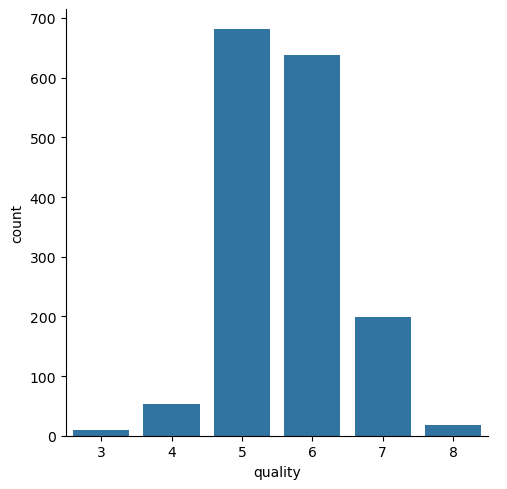

In [23]:

sns.catplot(x='quality', kind = 'count' ,data = df)


<Axes: xlabel='quality', ylabel='volatile acidity'>

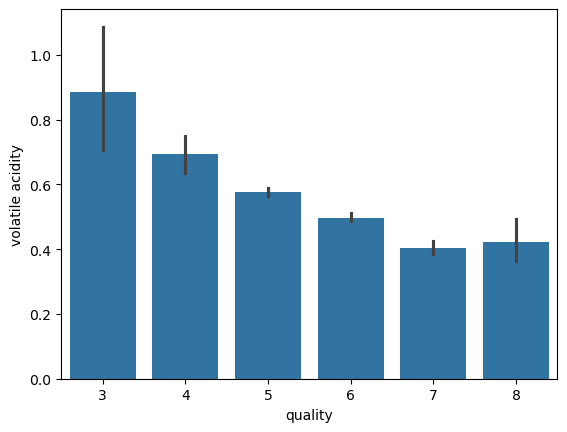

In [24]:

sns.barplot(x='quality', y = 'volatile acidity', data = df)


<Axes: >

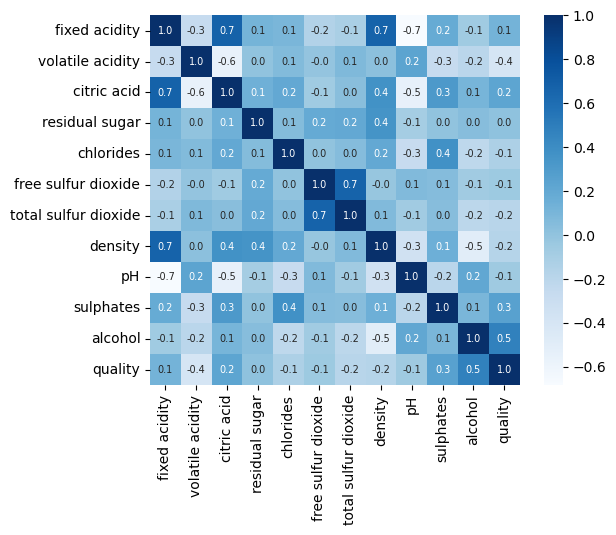

In [25]:

sns.heatmap(df.corr() ,  cbar=True , square=True , fmt = '.1f' , annot=True , annot_kws = {'size' : 7} , cmap='Blues' )
